### ZEROING OUT GRADIENTS IN PYTORCH
* optimizer.zero_grad()
* model.zero_grad()

In [32]:
import torch
dtype = torch.float
device = torch.device('cpu')

In [36]:
import math
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

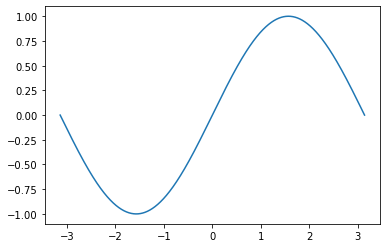

In [42]:
from matplotlib import pyplot as plt
plt.plot(x, y)

In [61]:
params = torch.randn((1, 4), device=device, dtype=dtype)
print(params)

tensor([[ 1.0902, -0.0146,  0.4384,  1.4383]])


In [62]:
learning_rate = 1e-6
for t in range(2000):
    y_pred = a + b * x + c * x **2 + d * x ** 3
    
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)
    grad_y_pred = 2.0 * (y_pred - y)
    grad = torch.tensor([
        grad_y_pred.sum(),
        (grad_y_pred * x).sum(),
        (grad_y_pred * x **2).sum(),
        (grad_y_pred * x **3).sum()
    ])
    
    params -= learning_rate * grad

99 10.708653450012207
199 10.708653450012207
299 10.708653450012207
399 10.708653450012207
499 10.708653450012207
599 10.708653450012207
699 10.708653450012207
799 10.708653450012207
899 10.708653450012207
999 10.708653450012207
1099 10.708653450012207
1199 10.708653450012207
1299 10.708653450012207
1399 10.708653450012207
1499 10.708653450012207
1599 10.708653450012207
1699 10.708653450012207
1799 10.708653450012207
1899 10.708653450012207
1999 10.708653450012207


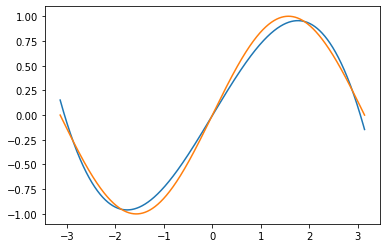

In [63]:
y_pred = a + b * x + c * x**2 + d * x**3
plt.plot(x, y_pred)
plt.plot(x, y)

### use AutoGrad

In [71]:
params = torch.randn((1, 4), device=device, dtype=dtype, requires_grad=True)
print(params)

tensor([[ 0.4181, -0.4695,  1.4524,  0.8969]], requires_grad=True)


In [72]:
for t in range(2000):
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss)
    loss.backward()
    with torch.no_grad():
        params -= learning_rate * params.grad
        params.grad = None

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [66]:
import torch as tc
from torch import optim
import torchvision as tv
from torchvision import transforms

In [69]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = tv.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = tv.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = tc.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [105]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [106]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [107]:
trainset[0][0].shape

torch.Size([3, 32, 32])

In [109]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finish Training')

[1,  2000] loss: 2.216
[1,  4000] loss: 1.907
[1,  6000] loss: 1.691
[1,  8000] loss: 1.629
[1, 10000] loss: 1.552
[1, 12000] loss: 1.506
[2,  2000] loss: 1.432
[2,  4000] loss: 1.414
[2,  6000] loss: 1.388
[2,  8000] loss: 1.338
[2, 10000] loss: 1.329
[2, 12000] loss: 1.319
Finish Training
